# **Lecture: Convolution Layer Introduction**

**(PLEASE CLEAR THE KERNEL IF YOU RUN THIS NOTEBOOK (once you are finished puzzling)**

In [2]:
# Import tensorflow.
import tensorflow as tf

# PIL (Pillow) for working with images.
import PIL
from PIL import Image , ImageOps

# Used for globbing up directories.
import glob

# The Data Tools 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Import the Keras tools.
from tensorflow import keras

# Network type.
from tensorflow.keras import models 

# Layer information.
from tensorflow.keras import layers # import Conv2D, MaxPooling2D, Dense, Flatten, Dropout

# For editing images. 
from tensorflow.keras.preprocessing.image import ImageDataGenerator
# from tensorflow.keras.utils import to_categorical

print("Tensorflow version:", tf.__version__)
print("Pandas version:", pd.__version__)
print("Keras version:", keras.__version__)
print("Pillow version:", PIL.__version__,"\n")

physical_devices = tf.config.list_physical_devices('GPU') 
print("GPU's:",physical_devices)
for gpu_instance in physical_devices: 
    tf.config.experimental.set_memory_growth(gpu_instance, True)

Tensorflow version: 2.1.0
Pandas version: 1.1.5
Keras version: 2.2.4-tf
Pillow version: 8.1.0 

GPU's: [PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU'), PhysicalDevice(name='/physical_device:GPU:1', device_type='GPU')]


In [2]:
X = np.array(Image.open("../Data/recreation/10Knots/Alpine_Butterfly_Knot/DiffuseLight/Set/IMG_6322.jpg"))

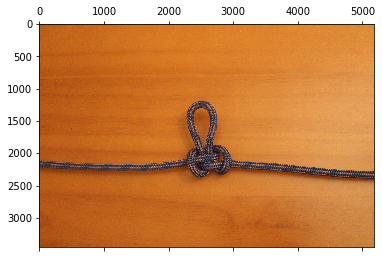

In [3]:
plt.matshow(X) #Very high resolution, starting with the best image is a good idea, but data expensive

In [4]:
np.shape(X)

(3456, 5184, 3)

In [5]:
X  = X.reshape((1, 3456, 5184, 3)) #The 3 here is RGB, 1 is 1 pixel, I think?

In [ ]:
initializer = tf.keras.initializers.RandomNormal(seed=1337) #Random normal from Keras/ 
model = models.Sequential() #Used in network on project
model.add(layers.Conv2D(10, input_shape = (3456, 5184, 3), kernel_size=(3 , 3), kernel_initializer = initializer, use_bias=False))
# 2D convolution is for images, 3D convolution is 3-dimentional object data being analyzed 3dimentional, super high computational
# 10, is number of filters, hope that each encapsulates a different aspect of the image
# need to include an initializer or it will all be random

In [1]:
model.build() #stand up model

NameError: name 'model' is not defined

In [12]:
model.summary() #The more parameters means more GPUs 270 is size of kernel length(3) x width(3) x RGB(3) x number of filters(10)

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 3454, 5182, 10)    270       
Total params: 270
Trainable params: 270
Non-trainable params: 0
_________________________________________________________________


In [13]:
Y_hat = model.predict(X)

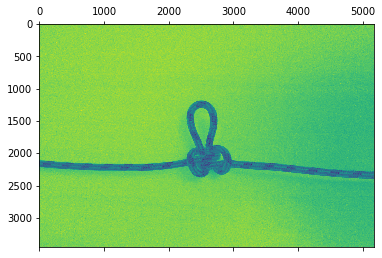

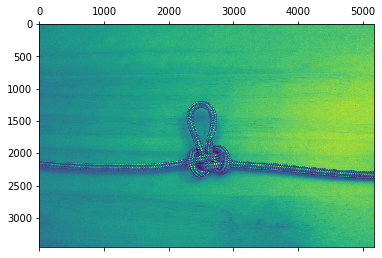

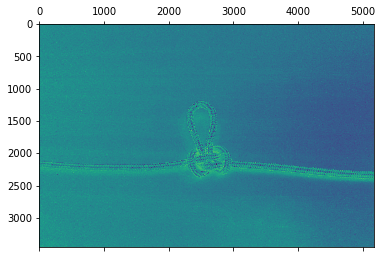

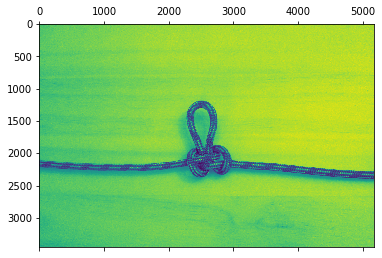

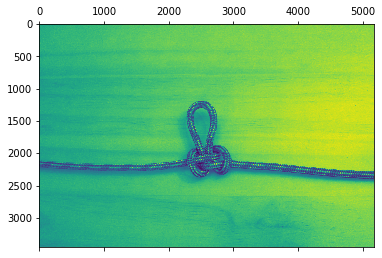

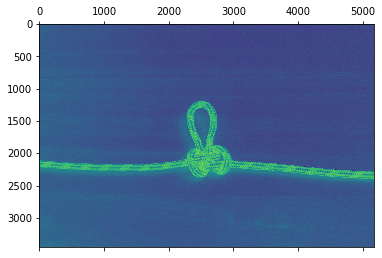

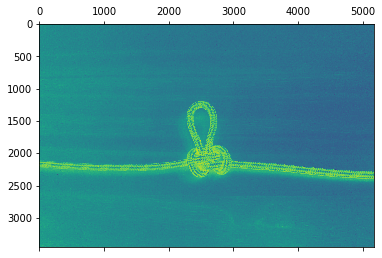

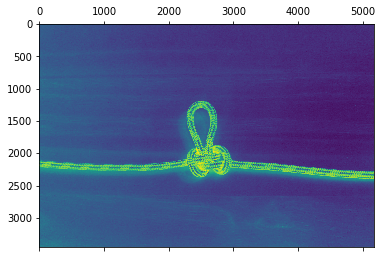

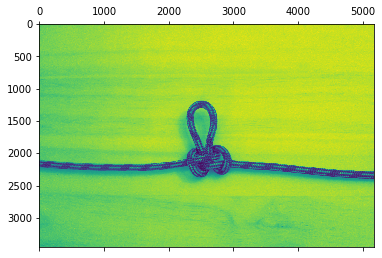

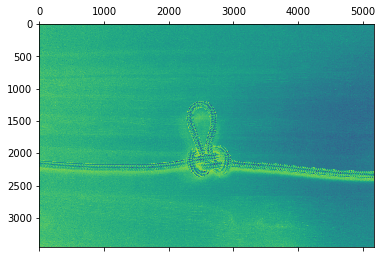

In [14]:
for i in range(np.shape(Y_hat)[3]):
    plt.matshow(Y_hat[0][:,:,i])

In [ ]:
model.add(layers.MaxPooling2D(pool_size=(50,50))) #pooling makes things smaller and more manageable GPU-wise

In [15]:
model.build()
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 3454, 5182, 10)    270       
Total params: 270
Trainable params: 270
Non-trainable params: 0
_________________________________________________________________


In [ ]:
for i in range(100):
    Y_hat = model.predict(X)

In [ ]:
for i in range(np.shape(Y_hat)[3]):
    plt.matshow(Y_hat[0][:,:,i])